In [65]:
import pyforest

import warnings
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv('customer_churn.csv')
df

<IPython.core.display.Javascript object>

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Let's explore the data - EDA

In [67]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Let's check categorical data

In [68]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [69]:
# Explore all categorical features using loop to check whether the dataset is imbalanced or not
col_name = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod', 'Churn']

for col in col_name:
    print(f'Column: {col}')
    print(df[col].value_counts())
    print('\n')


Column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64


Column: SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64


Column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


Column: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


Column: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


Column: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


Column: OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


Column: OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


Column: DeviceProtection
Devi

# We can see the dataset is pretty much balanced

In [70]:
# Checking null values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# That's great!!! There are no null values present in the dataset

In [71]:
# drop the 'customer_id' column as it is irrelevant

df_new = df.drop('customerID', axis='columns')
df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [72]:
df_new.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [73]:
# Converting TotalCharges column type in to float64

# Convert object datatype to float
df_new['TotalCharges'] = pd.to_numeric(df_new['TotalCharges'], errors='coerce')
df_new.dtypes

<IPython.core.display.Javascript object>

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# One Hot Encoding will increase out features in the dataset (sad) so we will use LabelEncoder (happy)

In [74]:
# Using LabelEncoder to the object type columns

from sklearn.preprocessing import LabelEncoder


# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on each categorical column
for column in df_new.select_dtypes(include=['object']).columns:
    df_new[column] = label_encoder.fit_transform(df_new[column])


In [75]:
# Display the DataFrame after label encoding
df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

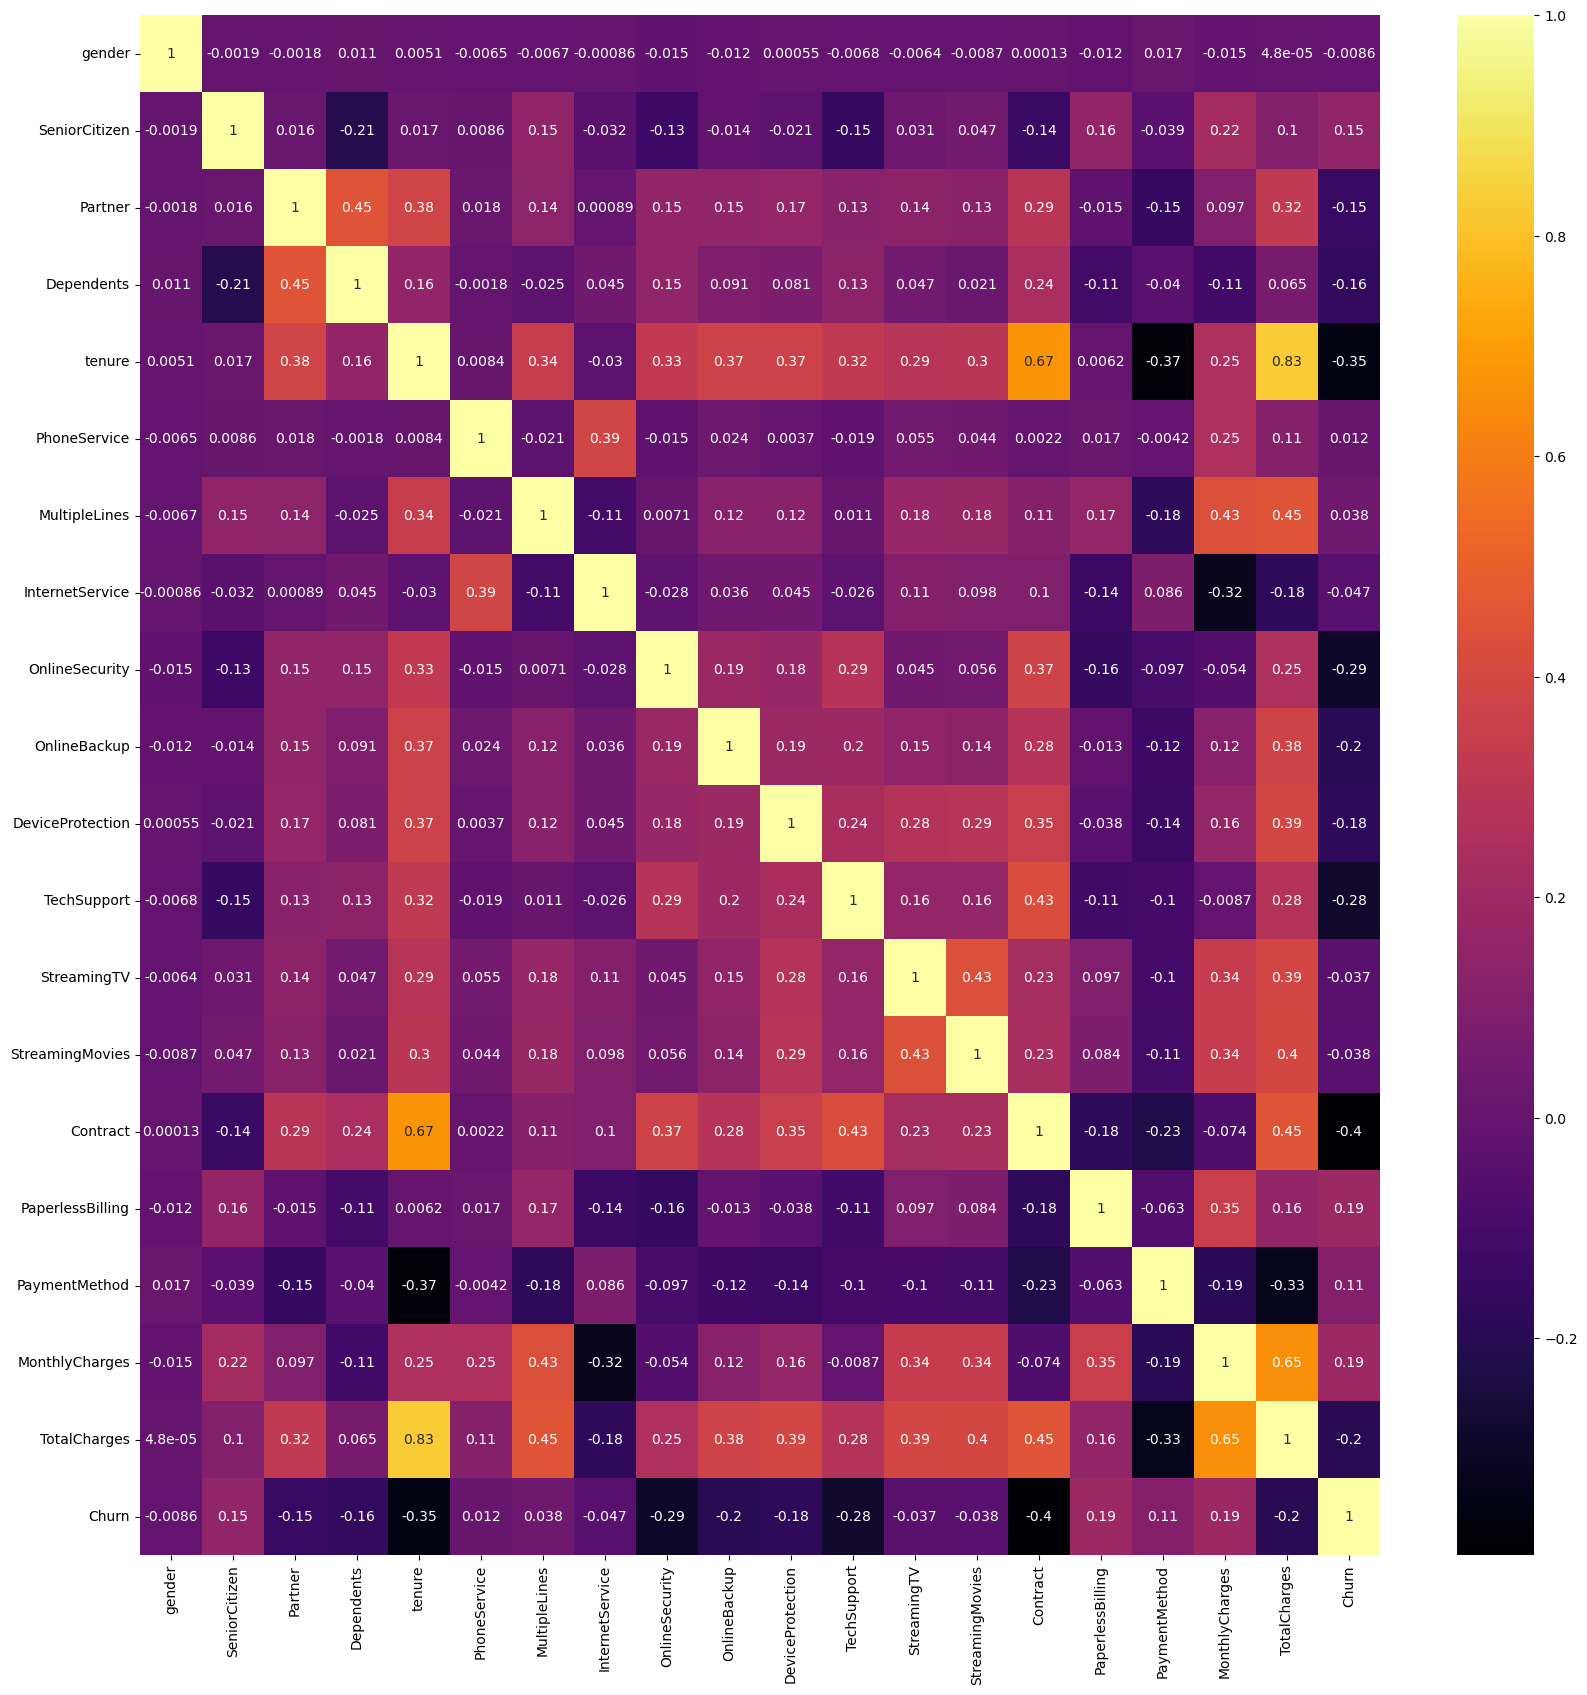

In [76]:
# Plotting the correlation matrix

plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(), annot= True, cmap= 'inferno')
plt.show()

In [103]:
imp_features=['TotalCharges','Contract','TechSupport','OnlineSecurity','tenure']
imp_features

['TotalCharges', 'Contract', 'TechSupport', 'OnlineSecurity', 'tenure']

In [105]:
X= df_new[imp_features]
y= df_new['Churn']

In [77]:
# First dividing the features in to dependent and independent variable

X = df_new.iloc[:,:-1] # independent features
y= df_new.iloc[:,-1]  # dependent feature

In [106]:
X

,TotalCharges,Contract,TechSupport,OnlineSecurity,tenure
0,29.85,0,0,0,1
1,1889.50,1,0,2,34
2,108.15,0,0,2,2
3,1840.75,1,2,2,45
4,151.65,0,0,0,2
...,...,...,...,...,...
7038,1990.50,1,2,2,24
7039,7362.90,1,0,0,72
7040,346.45,0,0,2,11
7041,306.60,0,0,0,4


In [107]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [108]:
X.dtypes

TotalCharges      float64
Contract            int64
TechSupport         int64
OnlineSecurity      int64
tenure              int64
dtype: object

# Performing Logistic Regression to predict the output 

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' is your input data and 'y' is the target variable
# Replace 'X' and 'y' with your actual data

# Handle NaN values with imputation (replace NaN with the mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


# Step 1: Prepare the data
X = df_new.iloc[:,:-1] # independent features
y= df_new.iloc[:,-1]  # dependent feature

# Step 2: Split the dataset into train and test sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.20,random_state=42)

# Step 3: Build the logistic regression model on the train set
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

# Step 4: Predict the values on the test set
y_pred = model_logistic.predict(X_test)

# Step 5: Evaluate the model
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)*100

# Classification Report
class_report = classification_report(y_test, y_pred)

# Display the results
print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy Score: {accuracy:.2f}')
print('Classification Report:')
print(class_report)

Confusion Matrix:
[[916 120]
 [163 210]]
Accuracy Score: 79.91
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1036
           1       0.64      0.56      0.60       373

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [111]:
# Performing Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Step 2: Split the dataset into train and test sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 3: Build the decision tree model on the train set
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# Step 4: Predict the values on the test set
y_pred = model_dt.predict(X_test)

# Step 5: Evaluate the model
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)*100

# Classification Report
class_report = classification_report(y_test, y_pred)

# Display the results
print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy Score: {accuracy:.2f}')
print('Classification Report:')
print(class_report)

Confusion Matrix:
[[847 189]
 [186 187]]
Accuracy Score: 73.39
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1036
           1       0.50      0.50      0.50       373

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



# Step 2: Split the dataset into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Step 3: Build the Random Forest model on the train set
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Predict the values on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)*100

# Classification Report
class_report = classification_report(y_test, y_pred)

# Display the results
print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy Score: {accuracy:.2f}')
print('Classification Report:')
print(class_report)

Confusion Matrix:
[[1333  206]
 [ 293  281]]
Accuracy Score: 76.38
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1539
           1       0.58      0.49      0.53       574

    accuracy                           0.76      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.75      0.76      0.76      2113



# Model Accuracy is not upto the mark by using Logistic Regression, Decision Tree, Random Forest